# Introducción a la teoría de la información

La teoría de la información es un subcampo de la matemática que estudia la transmisión de datos sobre un canal con ruido. 
Una de sus contribuciones fundamentales es la idea de cómo cuantificar la cantidad de información en un evento de una variable aletatoria, llamado entropía.

Calcular la información y la entropía es de utilidad en muchas aplicaciones de Machine Learning: la selección de características (features) de entrada mediante información mutua, como para el desarrollo de modelos árboles de decisión, en los modelos de clasificación, etc.

## Cantidad de información y entropía

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

La **cantidad de contenido de información de Shannon** de un resultado $x$ se define como:

$$
h(x) = log_2(\frac{1}{P(x)}) = -log_2(P(x))
$$

Y se mide en **bits**.

Ejemplo 1. Arrojar una moneda (distribución de Bernoulli, asumiendo misma probabilidad para cada resultado posible).

In [2]:
p = 0.5 # Probabilidad de un evento
h = -np.log2(p)
print("p(x)=%.3f. Cantidad de información: %.3f bits" %(p,h) )

p(x)=0.500. Cantidad de información: 1.000 bits


Ejemplo 2. Arrojar un dado de sesis caras no sesgado.

In [3]:
p = 1.0 / 6.0 # Probabilidad de un evento
h = -np.log2(p)
print("p(x)=%.3f. Cantidad de información: %.3f bits" %(p,h) )

p(x)=0.167. Cantidad de información: 2.585 bits


Cuanto menor es la probabilidad de ocurrencia de un evento, mayor es la entropía (resultado más inesperado, i.e. mayor información o *novedad*).

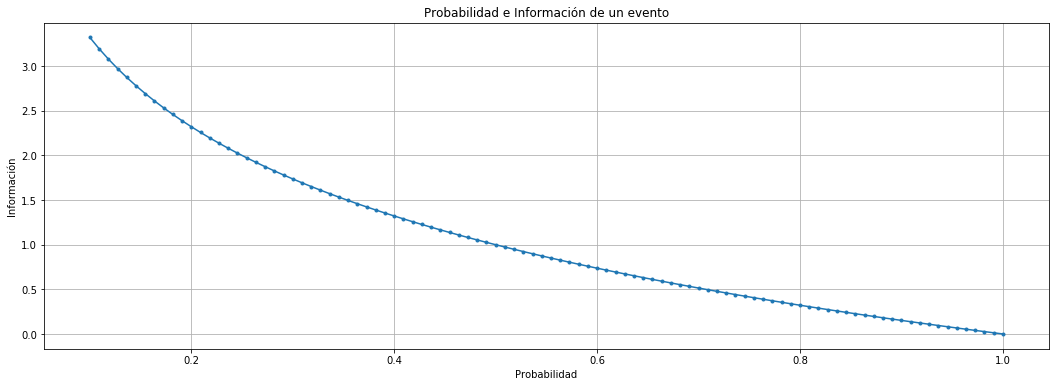

In [4]:
p = np.linspace(0.1,1.0,100)
h = -np.log2(p)

fig,axes = plt.subplots(1,1,figsize=(18,6))
axes.plot(p,h,marker=".")
axes.grid(which='Both')
axes.set_title("Probabilidad e Información de un evento")
axes.set_xlabel("Probabilidad")
axes.set_ylabel("Información")
plt.show()

Antes de definir la entropía, se debe definir un ensamble.

Un **ensamble $X$** es una tripla $(x,A_X,P_X)$  deonde el resultado $x$ es el valor de una variable aleatoria, que toma uno de un conjunto de valores posibles $A_X = {a_1,a_2,...,a_I}$, con probabilidades de ocurrencia $P_X={p_1,p_2,...,p_I}$, con $P(x=a_i)= p_i, p_i \ge 0$ y $\sum_{a_i \in A_X} P(x=a_i) = 1$.




Se define la **entropía de Shannon** $H(X)$ de un ensamble $X$ como el promedio del contenido de información de Shannon:


$$
H(X) = \sum_{x \in A_X} P(x) \frac{1}{log(P(x))} = - \sum_{x \in A_X}P(x) log(P(x))
$$

Implementación y ejemplo para una V.A. con distribución de Bernoulli.

In [5]:
def entropy(X,bins):
  # 1. Obtener p(x). Aquí se usa histograma pero se pueden usar otros métodos 
  #    también, ej: densidad de kernel.
  px = np.histogram(X,bins)[0] # obtener histograma
  px_norm = px / np.sum(px) # normalizar 
  px_norm = px_norm[np.nonzero(px_norm)] # eliminar ceros
  return -np.sum(px_norm*np.log2(px_norm))

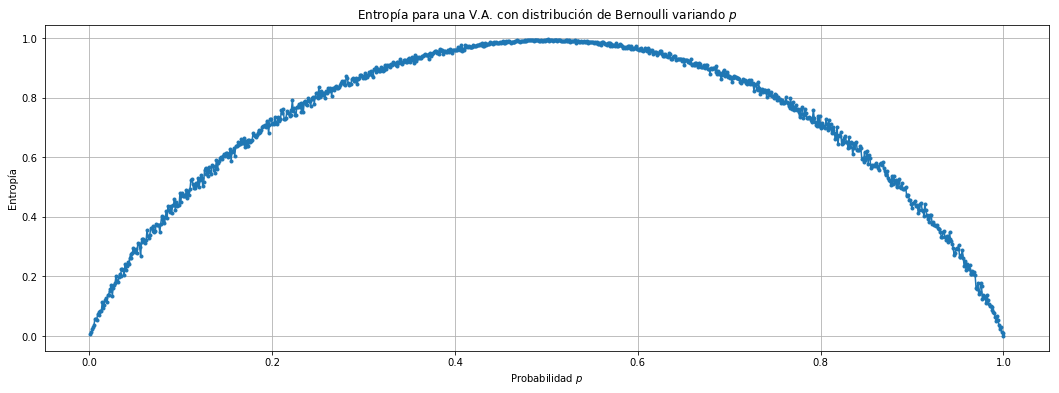

In [6]:
from scipy.stats import bernoulli

N_SAMPLES = 100 # Cantidad de muestras de la V.A. 
N_BINS = 2 # Cantidad de bins para estimar p(X)

M = 1000 # Cantidad de valores de p a ensayar (de 0 a 1.0)
entropies = np.zeros(M)
probs = np.linspace(0.001,1.0,M)

N_ITERATIONS = 50 # Cantidad de repeticiones
for j in range(N_ITERATIONS):
    for i,p in enumerate(probs):  
        X = bernoulli.rvs(size=N_SAMPLES,p=p)
        entropies[i] += entropy(X,N_BINS)
entropies/=N_ITERATIONS

fig,axes = plt.subplots(1,1,figsize=(18,6))
axes.plot(probs,entropies,marker=".")
axes.grid(which='Both')
axes.set_title("Entropía para una V.A. con distribución de Bernoulli variando $p$")
axes.set_xlabel("Probabilidad $p$")
axes.set_ylabel("Entropía")
plt.show()

## Divergencia entre distribuciones

Existen muchas situaciones en las que es de interés comparar dos distribuciones de probabilidad para una misma variable aleatoria. Por ejemplo, se puede tener una variable aleatoria y una distribución real de la misma y una distribución de una aproximación, en cuyo caso es de interés cuantificar qué tan buena es esa aproximación.

### Divergencia de Kullback-Leibler o entropia relativa

Si se tienen dos distribuciones de probabilidad separadas $P(x)$ y $Q(x)$ para una misma variable $x$, es posible medir qué tan diferentes son utilizando la **divergencia  de Kullback-Leibler (KL)**:

$$
D_{KL}(P||Q) = -\sum^{x \in X} P(x) log\left( \frac{Q(x)}{P(x)} \right)
$$

En el caso de variables discretas, la divergencia KL representa la cantidad de información adicional necesaria para enviar un mensaje conteniendo símbolos con una probabilidad de distribución $P$ cuando se usa un código diseñado para minimizar el tamaño de mensajes procedentes de una distribución de probabilidad Q.

Como la divergencia KL es no-negativa, y es cero únicamente cuando P Y Q son la misma distribución (en el caso de variables discretas), a menudo se la interpreta como una medida de distanca entre distribuciones. No obstante, la **divergencia KL no es una distancia** porque no es simétrica:


$$
D_{KL}(P||Q) \neq D_{KL}(Q||P)
$$

Ejemplo. Cálculo de $D_{KL}(P||Q)$ y $D_{KL}(Q||P)$ para dos distribuciones discretas:

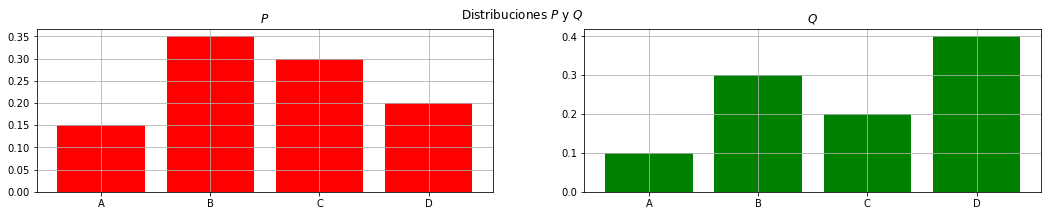

In [7]:
e = ['A','B','C','D']
p = np.array([0.15, 0.35, 0.30, 0.20])
q = np.array([0.10, 0.30, 0.20, 0.40])

fig,axes = plt.subplots(1,2,figsize=(18,3))
fig.suptitle("Distribuciones $P$ y $Q$")
axes[0].set_title("$P$")
axes[0].bar(e,p,color='r')
axes[0].grid(which='Both')
axes[1].set_title("$Q$")
axes[1].bar(e,q,color='g')
axes[1].grid(which='Both')
plt.show()

In [8]:
def kullback_liebler_div(p, q):
  return np.sum(p * np.log2(p/q))

In [9]:
kullback_liebler_div(p,q)

0.14107047279227697

In [10]:
kullback_liebler_div(q,p)

0.15779352338271885

In [11]:
kullback_liebler_div(p,p), kullback_liebler_div(q,q)

(0.0, 0.0)

## Entropía cruzada

Uno de los casos de aplicación típicos de entropía cruzada en Machine Learning es como función de pérdida a minimizar en la salida de un clasificador.

La entropía cruzada está muy relacionada con la divergencia KL, pero no son lo mismo.

### Diferencia entre entropía cruzada y entropía relativa (divergencia KL)

- **Entropía cruzada H(P,Q)**: promedio de bits totales necesarios para representar un evento de Q en lugar de P.
- **Entropía relativa (divergencia KL) $D_{KL}$**: promedio de bits adicionales necesarios para representar un evento de Q en lugar de P.

$$
D_{KL}(P||Q) = - \sum_{x \in X} log(\frac{Q(x)}{P(x)})
$$

$$
H(P,Q) = H(P) + D_{KL}(P||Q)
$$

Al igual que la divergencia KL, la entropía cruzada tampoco es simétrica:

$$
H(P,Q) \neq H(Q,P)
$$

Ejemplo. Cálculo de entropía cruzada para dos distribuciones discretas $P$ y $Q$.

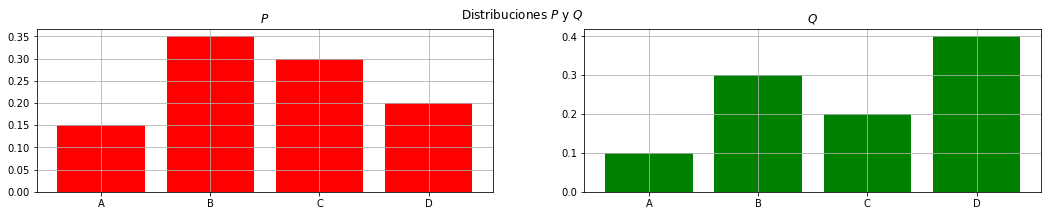

In [12]:
e = ['A','B','C','D']
p = np.array([0.15, 0.35, 0.30, 0.20])
q = np.array([0.10, 0.30, 0.20, 0.40])

fig,axes = plt.subplots(1,2,figsize=(18,3))
fig.suptitle("Distribuciones $P$ y $Q$")
axes[0].set_title("$P$")
axes[0].bar(e,p,color='r')
axes[0].grid(which='Both')
axes[1].set_title("$Q$")
axes[1].bar(e,q,color='g')
axes[1].grid(which='Both')
plt.show()

In [13]:
def cross_entropy(p, q):
  return -np.sum(p*np.log2(q))

In [14]:
cross_entropy(p, q)

2.0671912196349576

In [15]:
cross_entropy(q, p)

2.0042328680537342

Si se calcula la entropía cruzada para dos distribuciones iguales, entonces el resultado será la entropía de la distribución.

In [16]:
cross_entropy(p, p), cross_entropy(q, q)

(1.9261207468426806, 1.8464393446710154)

## Ganancia de información e información mutua

En machine learning, la ganancia de información calcula la reducción en la entropía resultante de aplicar alguna transformación a un conjunto de datos.

Ejemplos:

1. En el entrenamiento de árboles de decisión, cada nodo realiza una partición dividiendo los datos en grupos efectivos para la clasificación. Esta partición intenta maximizar la ganancia de información, o reducir la entropía (intutivamente, puede asociarse a menor "novedad").
2. En la selección de features, se calcula la ganancia de cada variable de entrada en el contexto de la variable de salida. En este caso, se calcula la información mutua entre variables.

### Ganancia de Información y Árboles de Decisión (Algoritmo ID3)

Un caso de aplicación de la ganancia de información es en los algoritmos de árboles de decisión. Para ello se puede estudiar una de sus primeras implementaciones, denominada *Iterative Dichotomizer 3 (ID3)*. El siguiente ejemplo fue tomado de {cite}`Mitchell1997`.
Supongamos que somos los propietarios de una cancha de Tennis y tenemos información sobre las condiciones meteorológicas y cuando se ocupó o no la cancha. Nos interesa contar con un algoritmo en el que ingresando las condiciones metereológicas podamos estimar si es más o menos probable que se ocupe la cancha. Este es un problema de clasificación binaria.

Con un árbol de decisión podemos realizar una serie de preguntas sobre el valor de los atributos de entrada que tengan una respuesta binaria. Cada respuesta representa una disminución de la entropía original del problema, pues nos aporta información que nos permite dar una respuesta más certera.

La pregunta es en qué órden deben consultarse los atributos y cuál es el umbral de decisión. El algoritmo ID3 plantea realizar una serie de particiones donde cada partición sucesiva reduzca al máximo la entropía. Para ello, calcula el atributo que aporta mayor ganancia de información y realiza una partición sobre este.


In [17]:
import pandas as pd

df = pd.read_csv("data/weather.csv")
df

,outlook,temperature,humidity,windy,play
0,overcast,hot,high,False,yes
1,overcast,cool,normal,True,yes
2,overcast,mild,high,True,yes
3,overcast,hot,normal,False,yes
4,rainy,mild,high,False,yes
5,rainy,cool,normal,False,yes
6,rainy,cool,normal,True,no
7,rainy,mild,normal,False,yes
8,rainy,mild,high,True,no
9,sunny,hot,high,False,no


In [18]:
total_samples = len(df)
total_samples

14

Nuestras variables de entrada son la humedad, el pronósico, la temperatura y el estado del viento.

In [19]:
attributes = ['humidity', 'outlook', 'temperature', 'windy']

Podemos calcular la entropía total a partir de las frecuencias de casos positivos y negativos.

In [20]:
def entropy2(p_positive,p_negative):
    return -(p_negative*np.log2(p_negative) + p_positive*np.log2(p_positive)) if ((p_positive > 0) & (p_negative > 0)) else 0

In [21]:
p_positive = len(df[df.play=='yes']) / total_samples
p_negative = len(df[df.play=='no']) / total_samples
entropy2(p_positive,p_negative)

0.9402859586706309

Luego podemos hacerlo para cada atributo y cada valor que toma ese atributo. El objetivo es encontrar cuál de ellos reduce la entropía, es decir, aporta información.
El pronóstico, por ejemplo, tiene tres valores posibles.

In [22]:
df.outlook.unique()

array(['overcast', 'rainy', 'sunny'], dtype=object)

In [23]:
outlook_sunny_pos = len(df[(df.outlook == 'sunny') & (df.play=='yes')])
outlook_sunny_neg = len(df[(df.outlook == 'sunny') & (df.play=='no')])
total_outlook_sunny = outlook_sunny_pos + outlook_sunny_neg
print("Positivos:", outlook_sunny_pos)
print("Negativos:", outlook_sunny_neg)
print("Total:", total_outlook_sunny)

Positivos: 2
Negativos: 3
Total: 5


In [24]:
entropy2(outlook_sunny_pos/total_outlook_sunny,
         outlook_sunny_neg/total_outlook_sunny)

0.9709505944546686

La entropía es aún mayor que la dataset, por lo tanto este atributo con este valor no parece ser una buena opción. Probaremos con el siguiente valor posible del pronóstico: nublado.

In [25]:
outlook_overcast_pos = len(df[(df.outlook == 'overcast') & (df.play=='yes')])
outlook_overcast_neg = len(df[(df.outlook == 'overcast') & (df.play=='no')])
total_outlook_overcast = outlook_overcast_pos + outlook_overcast_neg
print("Positivos:", outlook_overcast_pos)
print("Negativos:", outlook_overcast_neg)
print("Total:", total_outlook_overcast)

Positivos: 4
Negativos: 0
Total: 4


In [26]:
entropy2(outlook_overcast_pos/total_outlook_overcast,
         outlook_overcast_neg/total_outlook_overcast)

0

En este caso, la entropía es cero. Por lo tanto, si el pronóstico está nublado podemos asegurar un resultado. En el árbol de decisión, esto correspondería a una hoja.

In [27]:
outlook_rainy_pos = len(df[(df.outlook == 'rainy') & (df.play=='yes')])
outlook_rainy_neg = len(df[(df.outlook == 'rainy') & (df.play=='no')])
total_outlook_rainy = outlook_rainy_pos + outlook_rainy_neg
print("Positivos:", outlook_rainy_pos)
print("Negativos:", outlook_rainy_neg)
print("Total:", total_outlook_rainy)

Positivos: 3
Negativos: 2
Total: 5


In [28]:
entropy2(outlook_rainy_pos/total_outlook_rainy,outlook_rainy_neg/total_outlook_rainy)

0.9709505944546686

El pronósitco lluvioso, también tiene mucha entropía, por lo tanto no parece un buen criterio de partición.

**Cálculo de la ganancia de información**

Podemos calcular la ganancia de información para todos los valores que puede tomar un atributo $a_i$ como:

$$
IG(S,a) = H(S) - \sum_i{ H(S|a_i) }
$$

In [39]:
def calculate_information_gain(df,attribute, target_attr='play',
                                             value_positive='yes',
                                             value_negative='no',verbose=True):
    information_gain = 0

    total_samples = len(df)
    p_positive = len(df[df[target_attr]==value_positive]) / total_samples
    p_negative = len(df[df[target_attr]==value_negative]) / total_samples

    dataset_entropy = entropy2(p_positive,p_negative)

    information_gain += dataset_entropy

    attribute_values = df[attribute].unique()  
    for attr_value in attribute_values:
        print(" Attribute %s" % attribute)
        attr_value_pos = len(df[(df[attribute] == attr_value) & (df[target_attr]==value_positive)])
        attr_value_neg = len(df[(df[attribute] == attr_value) & (df[target_attr]==value_negative)])
        total_attr_value = attr_value_pos + attr_value_neg

        attr_entropy = entropy2(attr_value_pos/total_attr_value,attr_value_neg/total_attr_value)

        if verbose:
          print("   %s_%s entropy: %.3f" % (attribute, attr_value, attr_entropy))

        information_gain -= (total_attr_value/total_samples)*attr_entropy
        
    return information_gain

Por ejemplo, para el primer atributo podemos comprobar que cuando está nublado obtenemos la menor entropía.

In [30]:
calculate_information_gain(df,'outlook')

 Attribute outlook
   outlook_overcast_entropy: 0.000
 Attribute outlook
   outlook_rainy_entropy: 0.971
 Attribute outlook
   outlook_sunny_entropy: 0.971


0.2467498197744391

In [40]:
results = {}
for attr in attributes:
    results[attr] = calculate_information_gain(df,attr)

 Attribute humidity
   humidity_high entropy: 0.985
 Attribute humidity
   humidity_normal entropy: 0.592
 Attribute outlook
   outlook_overcast entropy: 0.000
 Attribute outlook
   outlook_rainy entropy: 0.971
 Attribute outlook
   outlook_sunny entropy: 0.971
 Attribute temperature
   temperature_hot entropy: 1.000
 Attribute temperature
   temperature_cool entropy: 0.811
 Attribute temperature
   temperature_mild entropy: 0.918
 Attribute windy
   windy_False entropy: 0.811
 Attribute windy
   windy_True entropy: 1.000


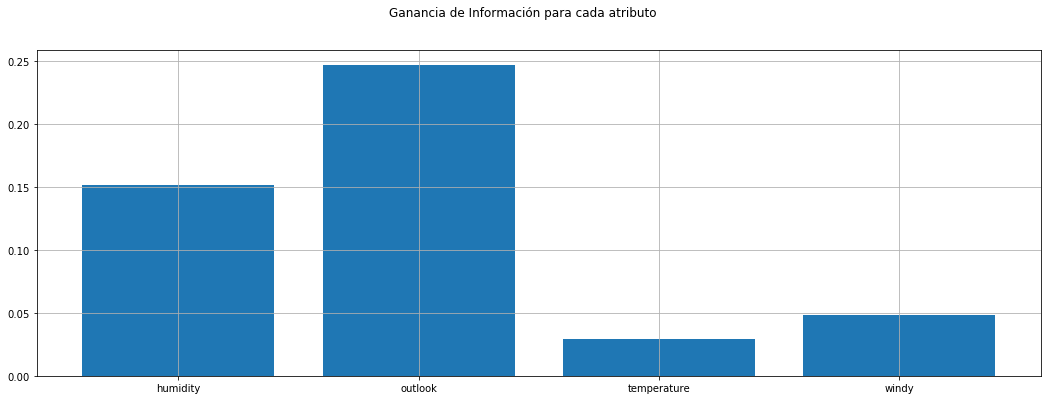

In [41]:
fig,axes = plt.subplots(1,1,figsize=(18,6))
fig.suptitle("Ganancia de Información para cada atributo")
axes.bar(results.keys(),results.values())
axes.grid(which='Both')
plt.show()

Los atributos que en términos generales (es decir, si consideramos todos sus valores posibles) más información nos aportan son el pronóstico y la humedad. Podemos descomponer cada uno de ellos como una variable binaria y repetir el análisis.

In [33]:
df_ohe = pd.get_dummies(df[attributes],drop_first=True)
df_ohe.head()

,windy,humidity_normal,outlook_rainy,outlook_sunny,temperature_hot,temperature_mild
0,False,0,0,0,1,0
1,True,1,0,0,0,0
2,True,0,0,0,0,1
3,False,1,0,0,1,0
4,False,0,1,0,0,1


In [34]:
results_ohe = {}
for attr in list(df_ohe.columns):
    results_ohe[attr] = calculate_information_gain(pd.concat([df_ohe,df.play],axis=1),attr)

 Attribute windy
   windy_False_entropy: 0.811
 Attribute windy
   windy_True_entropy: 1.000
 Attribute humidity_normal
   humidity_normal_0_entropy: 0.985
 Attribute humidity_normal
   humidity_normal_1_entropy: 0.592
 Attribute outlook_rainy
   outlook_rainy_0_entropy: 0.918
 Attribute outlook_rainy
   outlook_rainy_1_entropy: 0.971
 Attribute outlook_sunny
   outlook_sunny_0_entropy: 0.764
 Attribute outlook_sunny
   outlook_sunny_1_entropy: 0.971
 Attribute temperature_hot
   temperature_hot_1_entropy: 1.000
 Attribute temperature_hot
   temperature_hot_0_entropy: 0.881
 Attribute temperature_mild
   temperature_mild_0_entropy: 0.954
 Attribute temperature_mild
   temperature_mild_1_entropy: 0.918


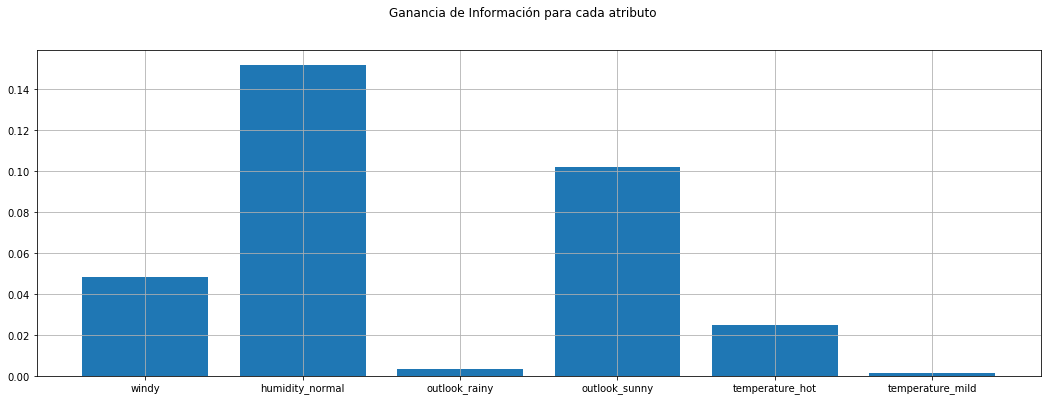

In [35]:
fig,axes = plt.subplots(1,1,figsize=(18,6))
fig.suptitle("Ganancia de Información para cada atributo")
axes.bar(results_ohe.keys(),results_ohe.values())
axes.grid(which='Both')
plt.show()

En este caso observamos que cuando la humedad está normal logramos la mayor reducción de la entropía.
Podemos comparar el resultado que obtuvimos con el árbol generado por SKLearn.

```{note}
DecisionTreeClassifier utiliza CART, no ID3.
```

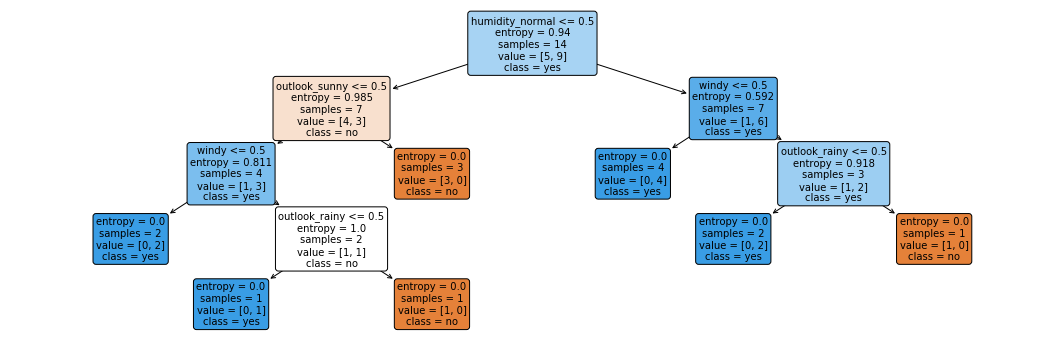

In [36]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import export_graphviz
from IPython.display import Image  

model=DecisionTreeClassifier(criterion='entropy',splitter='best')
model.fit(df_ohe,df.play.values)

plt.figure(figsize=(18,6))  
plot_tree(model,  filled=True, rounded=True,fontsize=10, 
               feature_names = list(df_ohe.columns), class_names=['no','yes'])
plt.show()

### Información Mutua

Dadas dos variables aleatorias $X$ e $Y$, la información mutua $I(X;Y)$ mide cuanto se reduce la incerteza de una de ellas cuando se conoce el valor de la otra. 

$$
I(X;Y) = H(X) + H(Y) - H(X|Y)
$$

## Bibliografía y Referencias

- "The Deep Learning Book". https://www.deeplearningbook.org/contents/prob.html
- "Information theory, inference and learning algorithms". MacKay D.J.C. CUP (2005)
- "Machine Learning: A Probabilistic Perspective". Kevin P. Murphy. MIT (2003)
- "Data mining: practical machine learning tools and techniques". Frank, Eibe; Hall, Mark A.; Pal, Christopher J.; Witten, Ian H. Morgan Kaufman (2017)
- "Machine Learning". Thomas Mitchell. McGraw Hill (1997).
- https://people.cs.umass.edu/~elm/Teaching/Docs/mutInf.pdf / https://people.cs.umass.edu/~elm/Teaching/Docs/probReview.pdf